In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib as plt
import seaborn as sns
from scipy.stats import shapiro
import scipy.stats as stats
import statistics as stat
from matplotlib import cm
import operator
from sklearn.preprocessing import Imputer
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing

## Business understanding
The Stack Overflow 2018 Survey gathers data from its registered developers around the world.Here we are focused on the gender gap of developers' salary around the world as it has been noticed in other working places.

In [2]:
os.chdir("C:\\Users\\xiaoling\\Desktop\\data_scientist_udacity\\term2 project 1\\developer_survey_2018")
df = pd.read_csv('survey_results_public.csv')
df.shape

C:\Users\xiaoling\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3018: DtypeWarning: Columns (8,12,13,14,15,16,50,51,52,53,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


(98855, 129)

In [3]:
df.head()

,Respondent,Hobby,OpenSource,Country,Student,Employment,FormalEducation,UndergradMajor,CompanySize,DevType,...,Exercise,Gender,SexualOrientation,EducationParents,RaceEthnicity,Age,Dependents,MilitaryUS,SurveyTooLong,SurveyEasy
0,1,Yes,No,Kenya,No,Employed part-time,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Mathematics or statistics,20 to 99 employees,Full-stack developer,...,3 - 4 times per week,Male,Straight or heterosexual,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Black or of African descent,25 - 34 years old,Yes,NaN,The survey was an appropriate length,Very easy
1,3,Yes,Yes,United Kingdom,No,Employed full-time,"Bachelor’s degree (BA, BS, B.Eng., etc.)","A natural science (ex. biology, chemistry, phy...","10,000 or more employees",Database administrator;DevOps specialist;Full-...,...,Daily or almost every day,Male,Straight or heterosexual,"Bachelor’s degree (BA, BS, B.Eng., etc.)",White or of European descent,35 - 44 years old,Yes,NaN,The survey was an appropriate length,Somewhat easy
2,4,Yes,Yes,United States,No,Employed full-time,Associate degree,"Computer science, computer engineering, or sof...",20 to 99 employees,Engineering manager;Full-stack developer,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,5,No,No,United States,No,Employed full-time,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",100 to 499 employees,Full-stack developer,...,I don't typically exercise,Male,Straight or heterosexual,Some college/university study without earning ...,White or of European descent,35 - 44 years old,No,No,The survey was an appropriate length,Somewhat easy
4,7,Yes,No,South Africa,"Yes, part-time",Employed full-time,Some college/university study without earning ...,"Computer science, computer engineering, or sof...","10,000 or more employees",Data or business analyst;Desktop or enterprise...,...,3 - 4 times per week,Male,Straight or heterosexual,Some college/university study without earning ...,White or of European descent,18 - 24 years old,Yes,NaN,The survey was an appropriate length,Somewhat easy


In [4]:
len(df.Country.unique())

184

## Data understanding

Nearly 100,000 developers from 184 countries took this survey and it gives a general depiction of developers working status worldwide. Each row of data represents a responder.

The dataset includes information of 5 sections as below:
1. Basic information
2. Work, Education, and Career
3. Technology and Tech Culture
4. Stack Overflow Usage + Community Questions
5. Demographic Information

## Data preparation
This analysis will focus on the worldwide salary difference between genders in developers, as well as in different countries. We also would like to see whether the difference is because of the educational difference, thus the columns we may used include "Gender", "ConvertedSalary", "Country" and "FormalEducation". We will check the missing values in these columns and fix it before beginning analysis.


## Question I: How many men and women have taken this survey?
The number of male and female developers in each country were examed and countries that have no female developers included in this survey were also listed. 

In [5]:
df['Gender'].isnull().mean()

0.34784280006069496

In [6]:
df['Gender'].unique()

array(['Male', nan, 'Female',
       'Female;Male;Transgender;Non-binary, genderqueer, or gender non-conforming',
       'Female;Male',
       'Male;Non-binary, genderqueer, or gender non-conforming',
       'Non-binary, genderqueer, or gender non-conforming', 'Transgender',
       'Female;Transgender',
       'Transgender;Non-binary, genderqueer, or gender non-conforming',
       'Female;Non-binary, genderqueer, or gender non-conforming',
       'Female;Transgender;Non-binary, genderqueer, or gender non-conforming',
       'Male;Transgender', 'Female;Male;Transgender',
       'Female;Male;Non-binary, genderqueer, or gender non-conforming',
       'Male;Transgender;Non-binary, genderqueer, or gender non-conforming'],
      dtype=object)

In [7]:
#Count respondent number in each country for male and female
genderCount = df.groupby(["Country","Gender"])['Respondent'].count().to_frame().reset_index()
genderCountPivot = genderCount.pivot(values='Respondent', index='Country', columns='Gender')[["Female", "Male"]].rename_axis(None, axis=1)
genderCountPivot.head()

,Female,Male
Country,,
Afghanistan,1.0,17.0
Albania,4.0,45.0
Algeria,3.0,55.0
Andorra,1.0,5.0
Angola,NaN,2.0


In [8]:
#calaculate the proportion of male and female
female = genderCountPivot['Female'].sum(axis=0)
male = genderCountPivot['Male'].sum(axis=0)

print("total responders", female + male)
print("% of female", female/(female+male)*100) 
print("% of male", male/(female+male)*100) 

total responders 63483.0
% of female 6.340280074980703
% of male 93.65971992501929


In [9]:
#find how many countries without female respondent
country_noFemale = genderCountPivot[genderCountPivot['Female'].isnull()].sort_values('Male',  ascending=False).reset_index()
country_noFemale.Country.count()

55

In [10]:
#Generate a table with female and male number listed for each country
genderCountPivot = genderCountPivot.dropna(subset=['Female']).sort_values('Male', ascending=False)
genderCountPivot.head(10)

,Female,Male
Country,,
United States,1288.0,13914.0
India,440.0,6213.0
United Kingdom,256.0,4260.0
Germany,193.0,4205.0
Canada,208.0,2201.0
Russian Federation,95.0,1632.0
France,83.0,1629.0
Brazil,58.0,1513.0
Australia,85.0,1389.0


In [11]:
df['Country'].value_counts().head()

United States     20309
India             13721
Germany            6459
United Kingdom     6221
Canada             3393
Name: Country, dtype: int64

In [12]:
country_noFemale.head() # find country without female responders

,Country,Female,Male
0,Dominican Republic,NaN,69.0
1,Azerbaijan,NaN,44.0
2,Uganda,NaN,37.0
3,Uzbekistan,NaN,29.0
4,United Republic of Tanzania,NaN,26.0


## Question 2: Are females paid less than males?

### Data preprocessing
Missing values were handled with different methods in numerical and categorical columns.Because here we only use descriptive methods, categorical data were not encoded. 

### Note: 
Because the salary level varies among countries, here we selected responders from United States as a representative to do the analysis.

### Handling missing values:
We only select responders that clearly stated as "Female" or "Male". Rows containing missing values in Gender column will be dropped after this selection;
For ConvertedSalary and categorical columns, missing values were filled with the most frequent values.

In [13]:
def handleMissingValues(df, country):
    """ 
    Handling missing values
    
    Keyword arguments:
    df -- the dataframe used for analysis
    country -- the country chosed for analysis
    """
    df = df[["Respondent","ConvertedSalary", "Gender",  "Country", "FormalEducation", "Employment", "YearsCodingProf"]]
    df = df[(df["Gender"].isin(["Female", "Male"])) & (df["Country"] == country)] 

    #Iterating over columns to fill missing values with the most frequent value
    columns = list(df)[2:]
    for i in columns:
        df[i] = df[i].fillna(df[i].value_counts().index[0])
        
    # Fill missing values in ConvertedSalary column
    df['ConvertedSalary'] = df['ConvertedSalary'].fillna(df['ConvertedSalary'].median())
    return df

In [14]:
df_us = handleMissingValues(df, "United States")

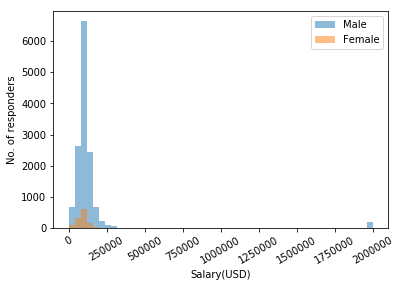

In [15]:
#histogram plot to check data distribution, whether normal distribution
#plt.hist(df['ConvertedSalary'], bins = 50, alpha = 0.5, label = 'All')
plt.hist(df_us[df_us['Gender'] == 'Male'].ConvertedSalary, bins = 50, alpha = 0.5, label = 'Male')
plt.hist(df_us[df_us['Gender'] == 'Female'].ConvertedSalary, bins = 50, alpha = 0.5, label = 'Female')
plt.legend(loc='upper right')
plt.xlabel('Salary(USD)')
plt.ylabel('No. of responders')
plt.xticks(rotation=30)
plt.show() #right skewed distribution

In [18]:
#Selecting responders which salary beteween 10,000 and 500,000 as lower and higher salary than this cutoff are more like outliers
#Only full time employees were considered into the analysis
df_us=df_us[(df_us["ConvertedSalary"] < 500000) & (df_us["ConvertedSalary"] > 10000) &(df_us["Employment"] == "Employed full-time")]

In [17]:
#mann whiteny test because data are not assuming normal distribution; to see the difference of salary between female and male
def calculatePValue(df):
    """Calculate the p value between male and female salary
    
    Keyword arguments:
    df -- the dataframe used for analysis
    """

    maleSalary = list(df[df['Gender'] == 'Male'].ConvertedSalary)
    femaleSalary = list(df[df['Gender'] == 'Female'].ConvertedSalary)
    u_statistic, pVal = stats.mannwhitneyu(maleSalary, femaleSalary)
    print("median of male salary:",stat.median(maleSalary),"\nmedian of female salary:", stat.median(femaleSalary),  "\np value is" , pVal)

calculatePValue(df_us)# In general the salary difference between females and males

median of male salary: 100000.0 
median of female salary: 100000.0 
p value is 6.2281548155542185e-22


## Question 3：Is there any difference of education level between female and male?

In [25]:
def my_autopct(pct):
    """ change the percentage into a floating point type
    
    Keyword arguments:
    pct -- the percentage 
    """
    return ('%.2f' % pct) if pct > 2 else ''

In [26]:
def piePlt(df,parameterCol):
    """plot pie chart of male and female by a designated parameter
    
    Keyword arguments:
    df -- the dataframe used for analysis
    parameterCol -- The parameter used for classification, for example, male and female salary were classified by their education level   
    """
    classCount = df.groupby(["Gender", parameterCol])["Respondent"].count().to_frame().reset_index()
    classCountPivot = classCount.pivot(values='Respondent', index=parameterCol, columns='Gender').reset_index()
    classCountPivot = classCountPivot[[parameterCol, "Female", "Male"]].set_index(parameterCol).fillna(0)

    plt.style.use('ggplot')
    cs=cm.Set1(np.arange(40)/40.)

    fig, axes = plt.subplots(nrows=1, ncols=2)
    for ax, col in zip(axes.flat, classCountPivot.columns):
        pie = ax.pie(classCountPivot[col], labels=None, autopct=my_autopct,  pctdistance=1.2, colors=sns.color_palette("Paired"))
        ax.set(ylabel='', title=col, aspect='equal')

    plt.legend(pie[0],labels=classCountPivot.index, bbox_to_anchor=(1.2,1), loc="upper left")
    plt.show()

#### Pie plot 1: The degree levels in female and male

In [27]:
df_us['FormalEducation'].unique()

array(['Bachelor', 'Some college/university', "Master's degree",
       'Associate degree', 'Professional/Dr. degree',
       'High school or lower'], dtype=object)

C:\Users\xiaoling\Anaconda3\lib\site-packages\matplotlib\legend.py:1266: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  warnings.warn("You have mixed positional and keyword arguments, some "


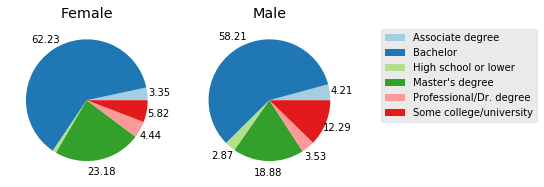

In [28]:
#Simplify descriptions in FormalEducation for easier pie plot annotation
df_us['FormalEducation']=df_us['FormalEducation'].replace({"Bachelor’s degree (BA, BS, B.Eng., etc.)":"Bachelor", 
                                        "Some college/university study without earning a degree":"Some college/university",
                                      "Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)":"High school or lower",
                                      "Master’s degree (MA, MS, M.Eng., MBA, etc.)":"Master's degree",
                                       "I never completed any formal education":"High school or lower",
                                        "Primary/elementary school":"High school or lower",
                                        "Professional degree (JD, MD, etc.)":"Professional/Dr. degree",
                                        "Other doctoral degree (Ph.D, Ed.D., etc.)":"Professional/Dr. degree"})

piePlt(df_us, 'FormalEducation') # plot education levels in United States

[Text(0, 0, 'High school or lower'),
 Text(0, 0, 'Some college/university'),
 Text(0, 0, 'Associate degree'),
 Text(0, 0, 'Bachelor'),
 Text(0, 0, "Master's degree"),
 Text(0, 0, 'Professional/Dr. degree')]

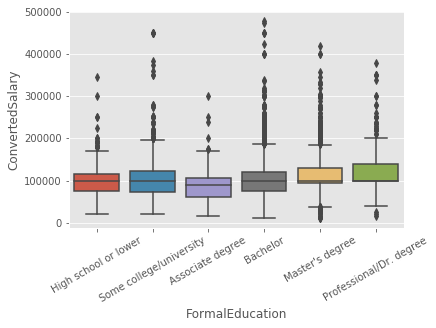

In [30]:
ax = sns.boxplot(x='FormalEducation', y='ConvertedSalary', data=df_us,order=["High school or lower","Some college/university","Associate degree",
                                                                        "Bachelor", "Master's degree","Professional/Dr. degree"])
ax.set_xticklabels(ax.get_xticklabels(),rotation=30)

In [31]:
df_us_bachelor = df_us[df_us['FormalEducation'] == 'Bachelor']
calculatePValue(df_us_bachelor) # calculate the salary difference between females and males in United States have 3-5 years of coding experience

median of male salary: 100000.0 
median of female salary: 92000.0 
p value is 1.1167221551625608e-12


## Question 4：Is there any difference of any difference of coding experiences between female and male?
#### Pie plot 2: The coding experiences in female and male

In [32]:
df_us['YearsCodingProf'].unique()

array(['12-14 years', '0-2 years', '21-23 years', '24-26 years',
       '3-5 years', '6-8 years', '9-11 years', '18-20 years',
       '15-17 years', '30 or more years', '27-29 years'], dtype=object)

C:\Users\xiaoling\Anaconda3\lib\site-packages\matplotlib\legend.py:1266: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  warnings.warn("You have mixed positional and keyword arguments, some "


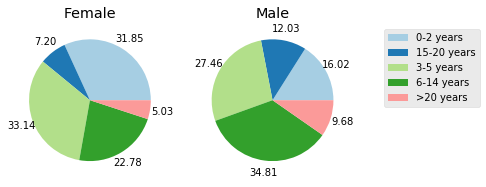

In [33]:
#Are there differences of coding experiences between females and males?

df_us['YearsCodingProf']=df_us['YearsCodingProf'].replace({"6-8 years":"6-14 years", 
                                        "9-11 years":"6-14 years",
                                      "12-14 years":"6-14 years",
                                      "15-17 years":"15-20 years",
                                       "18-20 years":"15-20 years",
                                       "21-23 years":">20 years",
                                       "24-26 years":">20 years",
                                        "27-29 years":">20 years",
                                        "30 or more years":">20 years"})


piePlt(df_us,'YearsCodingProf') #

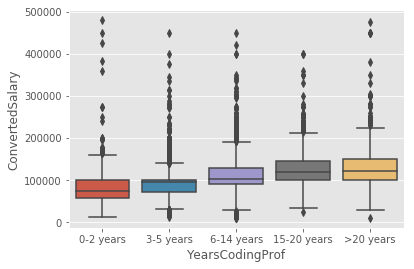

In [34]:
sns.boxplot(x='YearsCodingProf', y='ConvertedSalary', data=df_us,order=["0-2 years","3-5 years", "6-14 years", "15-20 years", ">20 years"])

In [35]:
df_3yCoding = df_us[df_us['YearsCodingProf'] == '3-5 years']
calculatePValue(df_3yCoding) # calculate the salary difference between females and males in United States have 3-5 years of coding experience

median of male salary: 95000.0 
median of female salary: 95000.0 
p value is 0.42629972449014397


In [36]:
df_6yCoding = df_us[df_us['YearsCodingProf'] == '6-14 years']
calculatePValue(df_6yCoding)

median of male salary: 105000.0 
median of female salary: 100000.0 
p value is 0.02126488517874695
